<div dir="rtl" style=" font-size: 27px;">
پیش پردازش داده ها با Pandas
</div>

<div dir="rtl" style=" font-size: 20px;">
ایمپورت کردن پکیج های موردنیاز
</div>

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import utils

<div dir="rtl" style=" font-size: 20px;">
خواندن داده ها از فایل csv و ذخیره در یک دیتافریم
</div>

In [179]:
df = pd.read_csv("JAPAN_EMSC.csv")

<div dir="rtl" style=" font-size: 20px;">
شروع ستون ایندکس از عدد یک بجای صفر
</div>

In [180]:
df = df.reset_index(drop=True)
df.index = range(1, len(df)+1)

<div dir="rtl" style=" font-size: 20px;">
نمایش تعداد سطرها و ستون ها
</div>

In [181]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in this file")

There are 138 rows and 7 columns in this file


<div dir="rtl" style=" font-size: 20px;">
نمایش نوع داده ها
</div>

In [182]:
df.dtypes

date_time_UTC       object
latitude_deg       float64
longitude_deg      float64
depth_km             int64
magnitude_value    float64
magnitude_type      object
region              object
dtype: object

<div dir="rtl" style=" font-size: 20px;">
تغییر نوع داده های عددی به float
</div>

In [183]:
df["depth_km"] = df["depth_km"].astype("float")

<div dir="rtl" style=" font-size: 20px;">
تغییر نوع ستون داده های ساعت و تاریخ از string به datetime
</div>

In [184]:
df["date_time_UTC"] = pd.to_datetime(df["date_time_UTC"], format="%Y-%m-%d %H:%M:%S")

<div dir="rtl" style=" font-size: 20px;">
نمایش تعداد داده های خالی در هر ستون
</div>

In [185]:
# df.isna().sum()

In [186]:
utils.count_missing_values(df)

{'date_time_UTC': 0,
 'latitude_deg': 0,
 'longitude_deg': 0,
 'depth_km': 0,
 'magnitude_value': 0,
 'magnitude_type': 0,
 'region': 0}

<div dir="rtl" style=" font-size: 20px;">
حذف کردن سطرهای تکراری
</div>

In [187]:
rows0 , col0 = df.shape
df = df.drop_duplicates()
rows1 , col1 = df.shape

print(f"A total number of {rows1 - rows0} duplicate rows removed")

A total number of 0 duplicate rows removed


<div dir="rtl" style=" font-size: 23px;">
شناسایی و حذف کردن رخدادهای زلزله خارج از ژاپن
</div>

<div dir="rtl" style=" font-size: 20px;">
شناسایی رخدادهای زلزله خارج از ژاپن
</div>

In [188]:
# print(df)
def spot_loation(value):
    if not "JAPAN" in value:
        value = "outside Japan"
    return value

df["region"] = df["region"].apply(spot_loation)

not_japan = (df["region"]=="outside Japan").sum()
print(f"Out of {df.shape[0]} records, {not_japan} of them are not related to Japan")   

Out of 138 records, 11 of them are not related to Japan


In [189]:
x = df[df["region"]=="outside Japan"]
print(x["region"])

1      outside Japan
3      outside Japan
4      outside Japan
30     outside Japan
47     outside Japan
72     outside Japan
77     outside Japan
79     outside Japan
85     outside Japan
135    outside Japan
136    outside Japan
Name: region, dtype: object


<div dir="rtl" style=" font-size: 20px;">
حذف کردن رخدادهای زلزله خارج از ژاپن از دیتافریم
</div>

In [190]:
df = df[df["region"]!="outside Japan"]
df.shape

(127, 7)

<div dir="rtl" style=" font-size: 20px;">
اضافه کردن ستون month برای نمایش ماه وقوع زلزله به حروف
</div>

In [191]:
df.insert(1, "Month", value= df["date_time_UTC"].apply(lambda x: calendar.month_name[x.month]))

<div dir="rtl" style=" font-size: 20px;">
اضافه کردن ستون category برای طبقه بندی شدت زلزله
</div>

In [192]:
def classify_mag(value):
    if value < 4:
        return "weak"
    elif 4 <= value <= 6:
        return "moderate"
    else:
        return "strong"
        
x = df["magnitude_value"].apply(classify_mag)
df.insert(7, "Category", value = x)

<div dir="rtl" style=" font-size: 20px;">
تغییر نام ستون region به place
</div>

In [193]:
df = df.rename(columns={"region":"place"})

<div dir="rtl" style=" font-size: 20px;">
اضافه کردن ستون region برای نمایش منطقه وقوع زلزله 
</div>

In [194]:
def f(x):
    x = x.split(",")
    return x[0]

df["region"] = df["place"].apply(f)

<div dir="rtl" style=" font-size: 20px;">
اضافه کردن ستون data_source
</div>

In [195]:
df["data_source"] = "EMSC"

<div dir="rtl" style=" font-size: 27px;">
تحلیل داده ها با Pandas
</div>

<div dir="rtl" style=" font-size: 20px;">
نمایش میانگین شدت زلزله و تعداد زلزله ها به تفکیک ماه و category
</div>

In [196]:
month_categ_stats = df.groupby(["Month","Category"]).agg(avg_magnitude=("magnitude_value", "mean"), earthquake_count=("magnitude_value", "count")).reset_index()
month_categ_stats["avg_magnitude"] = month_categ_stats["avg_magnitude"].round(2)
month_categ_stats.index = range(1, len(month_categ_stats)+1)
print(month_categ_stats)

       Month  Category  avg_magnitude  earthquake_count
1    October  moderate           4.53                31
2    October      weak           3.32                25
3  September  moderate           4.42                30
4  September      weak           3.33                41


<div dir="rtl" style=" font-size: 23px;">
گروه بندی داده ها بر اساس region و انجام تحلیل های مرتبط
</div>

<div dir="rtl" style=" font-size: 20px;">
تعداد کل زلزله ها در هر region
</div>

In [197]:
print(df.groupby("region").size().sort_values(ascending=False))

region
RYUKYU ISLANDS               35
NEAR EAST COAST OF HONSHU    28
OFF EAST COAST OF HONSHU     14
EASTERN HONSHU                7
HOKKAIDO                      7
KYUSHU                        6
BONIN ISLANDS                 5
IZU ISLANDS                   5
NEAR S. COAST OF HONSHU       5
NEAR WEST COAST OF HONSHU     5
SHIKOKU                       3
WESTERN HONSHU                3
SOUTHWESTERN RYUKYU ISL.      2
EASTERN SEA OF JAPAN          1
VOLCANO ISLANDS               1
dtype: int64


<div dir="rtl" style=" font-size: 20px;">
نمایش میانگین شدت و عمق زلزله ها در هر region
</div>

In [198]:
print(df.groupby("region").agg({"magnitude_value":"mean", "depth_km":"mean"}).round(2))

                           magnitude_value  depth_km
region                                              
BONIN ISLANDS                         4.10    435.60
EASTERN HONSHU                        3.36     40.00
EASTERN SEA OF JAPAN                  4.10    300.00
HOKKAIDO                              3.69     60.71
IZU ISLANDS                           4.50    318.80
KYUSHU                                3.40     21.67
NEAR EAST COAST OF HONSHU             4.10     48.71
NEAR S. COAST OF HONSHU               3.70     54.00
NEAR WEST COAST OF HONSHU             3.84     44.00
OFF EAST COAST OF HONSHU              4.62      9.07
RYUKYU ISLANDS                        3.61     13.80
SHIKOKU                               3.30     46.67
SOUTHWESTERN RYUKYU ISL.              4.00     52.50
VOLCANO ISLANDS                       4.60    148.00
WESTERN HONSHU                        3.17     13.33


<div dir="rtl" style=" font-size: 20px;">
نمایش ماکسیم شدت و عمق زلزله ها در هر region
</div>

In [199]:
print(df.groupby("region").agg({"magnitude_value":"max", "depth_km":"max"}).round(2))

                           magnitude_value  depth_km
region                                              
BONIN ISLANDS                          4.2     504.0
EASTERN HONSHU                         4.0      70.0
EASTERN SEA OF JAPAN                   4.1     300.0
HOKKAIDO                               4.3     130.0
IZU ISLANDS                            4.8     437.0
KYUSHU                                 4.1      30.0
NEAR EAST COAST OF HONSHU              6.0     100.0
NEAR S. COAST OF HONSHU                4.5     110.0
NEAR WEST COAST OF HONSHU              4.6     180.0
OFF EAST COAST OF HONSHU               4.9      12.0
RYUKYU ISLANDS                         5.3     140.0
SHIKOKU                                3.5      60.0
SOUTHWESTERN RYUKYU ISL.               4.5      55.0
VOLCANO ISLANDS                        4.6     148.0
WESTERN HONSHU                         3.3      20.0


<div dir="rtl" style=" font-size: 20px;">
نمایش تعداد کل زلزله ها در هر region با نمودار میله ای افقی
</div>

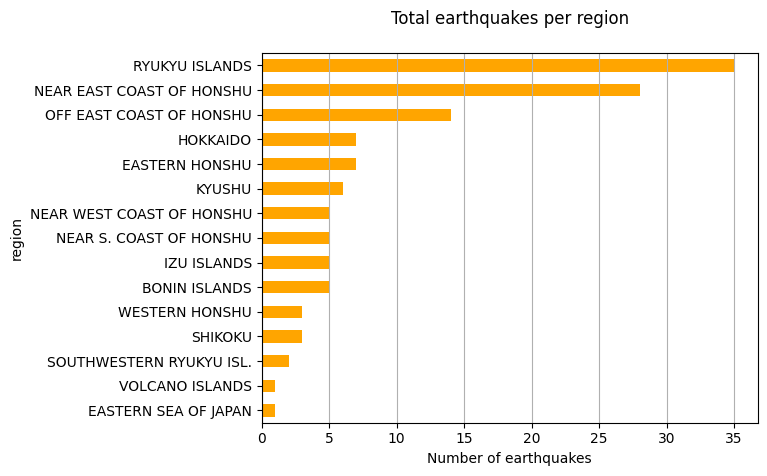

In [200]:
m = df.groupby("region").size().sort_values()
region_plot = m.plot(kind="barh", color="orange")
region_plot.set_xlabel("Number of earthquakes")
# m.set_ylabel("Region")
region_plot.set_title("Total earthquakes per region\n")
# region_plot.grid(True)
region_plot.grid(axis='x')

<div dir="rtl" style=" font-size: 27px;">
تحلیل داده ها با Numpy
</div>

<div dir="rtl" style=" font-size: 23px;">
قسمت اول: محاسبه فاصله محل وقوع زلزله تا توکیو
</div>

<div dir="rtl" style=" font-size: 20px;">
طول و عرض جغرافیایی توکیو٫ ژاپن
</div>

In [201]:
tokyo_latitude, tokyo_longitude  = 35.6764, 139.6500

<div dir="rtl" style=" font-size: 20px;">
محاسبه فاصله محل وقوع زلزله تا توکیو 
</div>

In [202]:
# distance = np.sqrt(
# (df["latitude_deg"] - tokyo_latitude)**2 +
# (df["longitude_deg"] - tokyo_longitude)**2  
# ).round(2)

# df.insert(4, "dist_to_Tokyo_km", value=distance)

#################### OR

#convert degrees to radians to be able to use them with np.sin(), np.cos() & np.arcsin()
earthquake_lat = np.radians(df["latitude_deg"])
earthquake_lng = np.radians(df["longitude_deg"])
tokyo_lat = np.radians(tokyo_latitude)
tokyo_lng = np.radians(tokyo_longitude)

dlat = earthquake_lat - tokyo_lat
dlng = earthquake_lng - tokyo_lng

a = np.sin(dlat / 2)**2 + np.cos(earthquake_lat) * np.cos(tokyo_lat) * np.sin(dlng / 2)**2
c = 2 * np.arcsin(np.sqrt(a))

# Radius of Earth in km = 6371.00
distance = (c * 6371).round(2)
df.insert(4, "dist_to_Tokyo_km", value=distance)

<div dir="rtl" style=" font-size: 23px;">
قسمت دوم: تحلیل شدت زلزله ها
</div>

<div dir="rtl" style=" font-size: 20px;">
بازه زمانی داده های استخراج شده
</div>

In [203]:
start_date = df.iloc[-1,0]
start_date = str(start_date).split()[0]
end_date = df.iloc[0,0]
end_date = str(end_date).split()[0]
print(f"From {start_date} to {end_date}")

From 2025-09-15 to 2025-10-18


<div dir="rtl" style=" font-size: 20px;">
میانگین شدت زلزله های رخ داده در ژاپن در بازه زمانی تعریف شده 
</div>

In [204]:
mag_average = np.mean(df["magnitude_value"])
print(f"Average magnitude for earthquakes from {start_date} to {end_date} was {mag_average:.2f}")

Average magnitude for earthquakes from 2025-09-15 to 2025-10-18 was 3.88


<div dir="rtl" style=" font-size: 20px;">
انحراف معیار و واریانس شدت زلزله های رخ داده در ژاپن در بازه زمانی تعریف شده 
</div>

In [205]:
mag_std_dev = np.std(df["magnitude_value"])
mag_var = mag_std_dev ** 2
print(f"Variance of magnitude for earthquakes from {start_date} to {end_date} was {mag_var:.2f}")
print(f"Standard deviation of magnitude for earthquakes from {start_date} to {end_date} was {mag_std_dev:.2f}")

Variance of magnitude for earthquakes from 2025-09-15 to 2025-10-18 was 0.43
Standard deviation of magnitude for earthquakes from 2025-09-15 to 2025-10-18 was 0.66


<div dir="rtl" style=" font-size: 20px;">
چارک اول و سوم و میانه شدت زلزله های رخ داده در ژاپن در بازه زمانی تعریف شده 
</div>

In [206]:
mag_p25 = np.percentile(df["magnitude_value"], 25)
mag_p50 = np.percentile(df["magnitude_value"], 50)
mag_p75 = np.percentile(df["magnitude_value"], 75)
print(f"From {start_date} to {end_date} magnitude for:")
print(f"25% of earthquakes was equal or less than {mag_p25:.2f}")
print(f"50% of earthquakes was equal or less than {mag_p50:.2f}")
print(f"75% of earthquakes was equal or less than {mag_p75:.2f}")

From 2025-09-15 to 2025-10-18 magnitude for:
25% of earthquakes was equal or less than 3.30
50% of earthquakes was equal or less than 3.90
75% of earthquakes was equal or less than 4.50


<div dir="rtl" style=" font-size: 27px;">
اکسپورت کردن داده های پردازش شده
</div>

In [207]:
df.to_csv('JAPAN_EMSC_cleaned.csv' , encoding='utf-8-sig', index=False)